In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data_dup = data.duplicated().any()

In [6]:
data_dup

np.True_

In [7]:
data = data.drop_duplicates()

In [8]:
data_dup = data.duplicated().any()

In [9]:
data_dup

np.False_

In [10]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() < 10:   # threshold, adjust as needed
        cate_val.append(column)
    else:
        cont_val.append(column)

cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
data['cp'].unique()

array([0, 1, 2, 3])

In [12]:
cate_val.remove('sex')
cate_val.remove('target')
pd.get_dummies(data,columns = cate_val, drop_first=True)


,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [17]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [18]:
X = data.drop('target', axis = 1)

In [19]:
Y = data['target']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [22]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,-1.153610,1,1,-0.091401,-0.532247,0,0,1.680713,0,-0.899544,2,0,2
349,0.839089,0,2,-0.091401,0.319348,0,1,-2.299069,0,0.135360,1,1,3
135,0.396267,0,0,2.189843,-0.416120,1,0,-0.156110,1,1.515232,1,2,1
389,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1
66,-0.157260,1,2,-0.091401,-0.958045,1,0,0.106294,0,0.135360,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1,1.391408,-0.029032,0,0,-0.287311,0,-0.899544,2,0,2
123,1.171205,0,2,0.478910,3.299932,1,0,0.324963,0,-0.209608,2,1,2
739,-0.267966,1,0,-0.205463,0.164513,0,1,0.499898,1,-0.899544,2,1,3
274,1.281911,1,0,1.619532,-0.358057,0,0,-0.505981,0,1.084022,2,0,1


In [23]:
Y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log = LogisticRegression()
log.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
y_pred1 = log.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(Y_test, y_pred1)

0.7868852459016393

In [29]:
from sklearn import svm

In [30]:
svm = svm.SVC()

In [31]:
svm.fit(X_train, Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
y_pred2 = svm.predict(X_test)

In [33]:
accuracy_score(Y_test, y_pred2)

0.8360655737704918

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [37]:
y_pred3 = knn.predict(X_test)

In [38]:
accuracy_score(Y_test, y_pred3)

0.7377049180327869

In [39]:
scores = [] 

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)   
    knn.fit(X_train, Y_train)                   
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(Y_test, y_pred)) 

In [40]:
scores

[0.6885245901639344,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.819672131147541,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393]

In [41]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7704918032786885

In [42]:
data = pd.read_csv('heart.csv')

In [43]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [44]:
data = data.drop_duplicates()

In [45]:
data.shape

(302, 14)

In [46]:
X = data.drop('target', axis = 1)
y  = data['target']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [48]:
from sklearn.tree import DecisionTreeClassifier


In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [51]:
y_pred4 = dt.predict(X_test)

In [52]:
accuracy_score(Y_test, y_pred4)

0.7049180327868853

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()

In [55]:
rf.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
rf = RandomForestClassifier()

In [57]:
rf.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
y_pred5 = rf.predict(X_test)

In [59]:
accuracy_score(Y_test, y_pred5)

0.819672131147541

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbc = GradientBoostingClassifier()

In [62]:
gbc.fit(X_train, Y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [63]:
y_pred6 = gbc.predict(X_test)

In [64]:
accuracy_score(Y_test, y_pred6)

0.8032786885245902

In [65]:
final_data = pd.DataFrame({
    'Models': ['LR','SVM','KNN','DT','RF','GB'],
    'ACC': [
        accuracy_score(Y_test, y_pred1),
        accuracy_score(Y_test, y_pred2),
        accuracy_score(Y_test, y_pred3),
        accuracy_score(Y_test, y_pred4),
        accuracy_score(Y_test, y_pred5),
        accuracy_score(Y_test, y_pred6)
    ]
})

print(final_data)


  Models       ACC
0     LR  0.786885
1    SVM  0.836066
2    KNN  0.737705
3     DT  0.704918
4     RF  0.819672
5     GB  0.803279


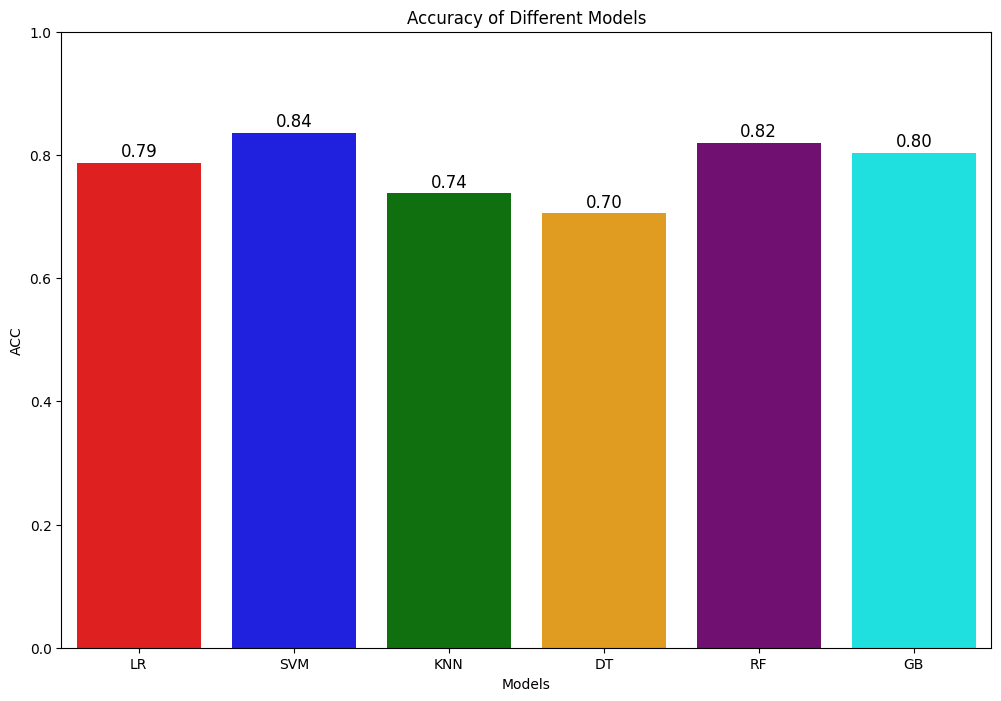

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

plt.figure(figsize=(12,8))
barplot = sns.barplot(x='Models', y='ACC', data=final_data, hue='Models', palette=colors, dodge=False, legend=False)

# Accuracy values on top
for i, acc in enumerate(final_data['ACC']):
    barplot.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)

plt.title("Accuracy of Different Models")
plt.ylim(0,1)
plt.show()


In [67]:
X = data.drop('target', axis = 1)
y = data['target']

In [68]:
X.shape

(302, 13)

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier()
rf.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [71]:
import pandas as pd

In [72]:
new_data = pd.DataFrame({
    'age': [50],
    'sex': ['1'],
    'cp': [0],
    'trestbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalach': [168],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [3],
    'thal': [3]
})

In [73]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,50,1,0,125,212,0,1,168,0,1.0,2,3,3


In [74]:
p = rf.predict(new_data)
if p[0] == 0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [75]:
import joblib

In [76]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [77]:
model = joblib.load('model_joblib_heart')

model.predict(new_data)

In [78]:
from tkinter import *
import joblib

def show_entry_field():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())

    # Predict using preloaded model
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])

    # Update result label
    if result == 0:
        result_label.config(text="No Heart Risk")
    else:
        result_label.config(text="Possibility of Heart Risk")

# Load model once (outside function for efficiency)
model = joblib.load('model_joblib_heart')

# Create main window
master = Tk()
master.title("Heart Disease Prediction System")
master.geometry("600x700")  # increase height for all fields

# Header Label
label = Label(master, text="Heart Disease Prediction System", bg="black", fg="white")
label.grid(row=0, columnspan=2, pady=10)

# Input Labels
Label(master, text="Enter Your Age").grid(row=1, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Male or Female [1=Male, 0=Female]").grid(row=2, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of CP").grid(row=3, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of Trestbps").grid(row=4, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of Chol").grid(row=5, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of FBS").grid(row=6, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of RestECG").grid(row=7, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of Thalach").grid(row=8, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of Exang").grid(row=9, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of Oldpeak").grid(row=10, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of Slope").grid(row=11, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of CA").grid(row=12, column=1, padx=10, pady=5, sticky='w')
Label(master, text="Enter Value of Thal").grid(row=13, column=1, padx=10, pady=5, sticky='w')

# Entry fields
e1 = Entry(master); e1.grid(row=1, column=2, padx=10, pady=5)
e2 = Entry(master); e2.grid(row=2, column=2, padx=10, pady=5)
e3 = Entry(master); e3.grid(row=3, column=2, padx=10, pady=5)
e4 = Entry(master); e4.grid(row=4, column=2, padx=10, pady=5)
e5 = Entry(master); e5.grid(row=5, column=2, padx=10, pady=5)
e6 = Entry(master); e6.grid(row=6, column=2, padx=10, pady=5)
e7 = Entry(master); e7.grid(row=7, column=2, padx=10, pady=5)
e8 = Entry(master); e8.grid(row=8, column=2, padx=10, pady=5)
e9 = Entry(master); e9.grid(row=9, column=2, padx=10, pady=5)
e10 = Entry(master); e10.grid(row=10, column=2, padx=10, pady=5)
e11 = Entry(master); e11.grid(row=11, column=2, padx=10, pady=5)
e12 = Entry(master); e12.grid(row=12, column=2, padx=10, pady=5)
e13 = Entry(master); e13.grid(row=13, column=2, padx=10, pady=5)

# Result Label
result_label = Label(master, text="", fg="red", font=("Helvetica", 12))
result_label.grid(row=31, column=1, pady=10)

# Predict Button
Button(master, text="Predict", command=show_entry_field).grid()

mainloop()


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
